## 청년층 SNS 사용률

In [37]:
import fontda
import pandas as pd
import numpy as np

In [38]:
# 파일 불러오기
file2='data/주로_이용하는_SNS_계정_123순위_20230713192732.xlsx'
df22=pd.read_excel(file2,header=1,index_col=1)
df22.head()

c:\Users\KDP-13\AppData\Local\anaconda3\envs\BY_YUNA_copy\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분별(1),사례수 (명),트위터(Twitter) (%),페이스북(Facebook) (%),싸이월드미니홈피 (%),카카오스토리 (%),인스타그램(instagram) (%),네이버밴드 (%),빙글 (%),비트윈 (%),...,싸이월드미니홈피 (%).1,카카오스토리 (%).1,인스타그램(instagram) (%).1,네이버밴드 (%).1,빙글 (%).1,비트윈 (%).1,웨이보 (%).1,핀터레스트 (%).1,틱톡 (%).1,기타 (%).1
구분별(2),,,,,,,,,,,,,,,,,,,,,
소계,전체,5590.5,15.3,50.9,2.4,33.8,54.2,30.9,0.1,0.5,...,2.7,26.3,61.1,28.6,0.1,0.2,0.4,0.4,6.4,0.1
남,성별,2790.5,15.1,57.3,2.3,28.8,51.9,34.8,0.1,0.5,...,2.2,23.4,57.4,29.8,0.1,0.2,0.8,0.1,5.7,0.0
여,NaN,2800.0,15.4,44.5,2.6,38.7,56.6,27.0,0.1,0.4,...,3.2,29.2,64.8,27.3,0.0,0.2,0.1,0.8,7.2,0.2
만10대미만,연령,7.0,0.0,67.2,0.0,0.0,22.4,22.0,0.0,0.0,...,0.0,0.0,53.6,25.9,0.0,0.0,0.0,0.0,31.5,0.0
만10-19세,NaN,547.0,13.7,61.0,1.2,13.6,65.3,19.3,0.0,0.0,...,1.8,9.5,74.0,13.3,0.0,0.0,0.4,0.8,23.7,0.0


In [39]:
# 연령행 슬라이싱
df22=df22.iloc[4:9,2:13]
# 필요한 sns 열만 제외하고 삭제
df22=df22.drop(['싸이월드미니홈피 (%)','빙글 (%)','비트윈 (%)','웨이보 (%)','핀터레스트 (%)'],axis=1)
# 열 이름 변경
df22=df22[['트위터(Twitter) (%)','페이스북(Facebook) (%)','카카오스토리 (%)','네이버밴드 (%)','인스타그램(instagram) (%)','틱톡 (%)']]
# 열 위치 변경
df22.columns=['트위터','페이스북','카카오스토리','네이버밴드','인스타그램','틱톡']
# 청소년층만 추출
df22=df22.iloc[[0]]
df22

,트위터,페이스북,카카오스토리,네이버밴드,인스타그램,틱톡
구분별(2),,,,,,
만10-19세,13.7,61.0,13.6,19.3,65.3,13.2


In [40]:
# 합계 컬럼 추가
df22['sum']=df22.sum(axis=1)

# 합계/값
df22=df22.div(df22['sum'],axis=0).apply(lambda x: round(x*100,1),axis=0)

# 합계 컬럼 삭제
df22.drop('sum',axis=1,inplace=True)

In [41]:
df22

,트위터,페이스북,카카오스토리,네이버밴드,인스타그램,틱톡
구분별(2),,,,,,
만10-19세,7.4,32.8,7.3,10.4,35.1,7.1


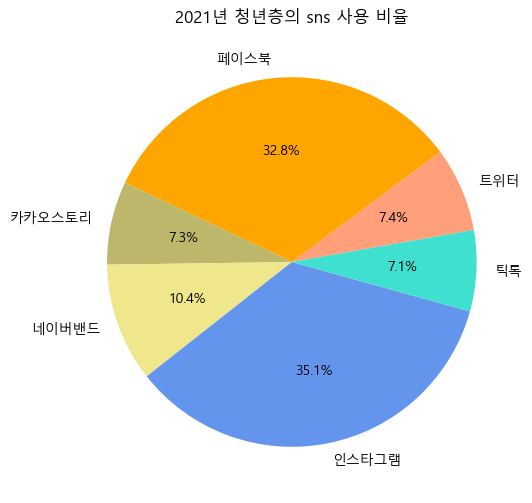

In [43]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.figure(figsize=(12, 6))
plt.pie(df22.loc['만10-19세'], labels=df22.columns, autopct='%1.1f%%',startangle=10,colors=['#FFA07A', '#FFA500','#BDB76B','#F0E68C', '#6495ED' ,'#40E0D0',])
plt.title('2021년 청년층의 sns 사용 비율')
plt.show()